By The End Of This Session You Should Be Able To:
----

- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners
- Use variables to _D.R.Y. out your code_

Load the `bike_share_201402_trip_data` data into a dataframe.  

In [144]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
!pwd
!ls data

df = pd.read_csv("data/bike_share_201402_trip_data.csv")

/Users/David/nf-sep-20/2020-ds-Pandas-Numpy
abalone.csv                     fat_content.csv
battery_life.csv                flu.csv
bike_share_201402_trip_data.csv iris.csv
brain_size.csv                  lrb.csv
cars_multivariate.csv           outage.csv
elec.csv                        plant.csv
election.csv                    toothgrowth.csv
email.csv                       utils.csv


How many observations are there?

In [149]:
# 144,015 observations!
df.shape[0]

144015

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 

<br>

<details><summary>
Click here for a hint…
</summary>
http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb#Renaming-Columns
</details>

In [150]:
df.columns = [x.lower().replace(" ", "_").replace("#", "num") for x in df.columns] # see alternative solution at the bottom of this nb!
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many types of subscription options are there?

In [151]:
df["subscription_type"].nunique() # show number of unique

2

What is the frequency of each subscription option?

In [152]:
df["subscription_type"].value_counts() #show frequency per unique value

Subscriber    113647
Customer       30368
Name: subscription_type, dtype: int64

Please plot the frequency of each subscription option with pie chart:

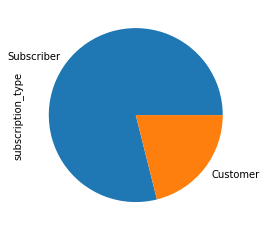

In [154]:
data = df["subscription_type"].value_counts() # put frequency in variable
data.plot(kind="pie");

Please plot the frequency of each subscription option with bar chart:

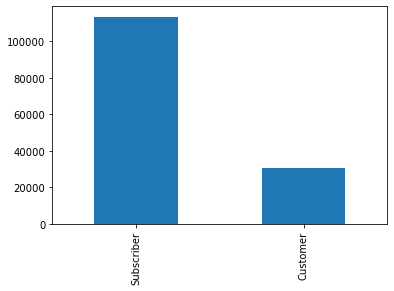

In [155]:
data.plot(kind="bar");

Repeat same analysis for start_station but sorted from high to low.

In [161]:
df["start_station"].nunique() # count unique values

69

In [178]:
df_ssf = df["start_station"].value_counts() # put (count values per group) in new variable
df_ssf.sort_values(ascending=False); # sort new variable from high to low
df_ssf10 = df_ssf.head(10) # put top 10 values into new variable


<AxesSubplot:ylabel='start_station'>

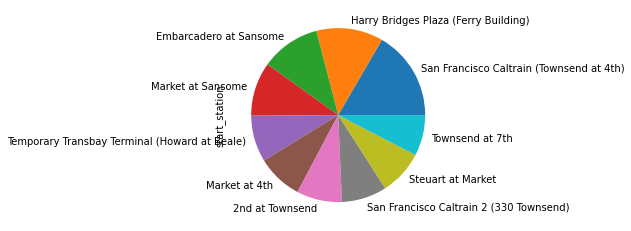

In [180]:
df_ssf10.plot(kind="pie")

<AxesSubplot:>

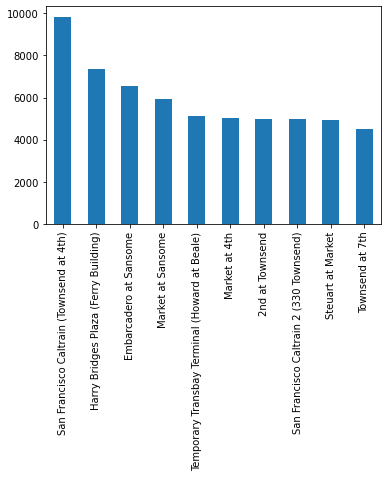

In [181]:
df_ssf10.plot(kind="bar")

Repeat same analysis for end_station but sorted from __low to high__.

In [182]:
print(df["end_station"].nunique())  # show no of unique stations
df_esf = df["end_station"].value_counts() # count value per group and assign to new df
df_esf.sort_values();# sort values on new df
df_esf10 = df_esf.head(10) # only top 10

69


<AxesSubplot:ylabel='end_station'>

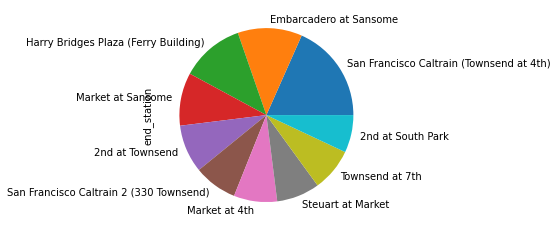

In [183]:
df_esf10.plot("pie")

<AxesSubplot:>

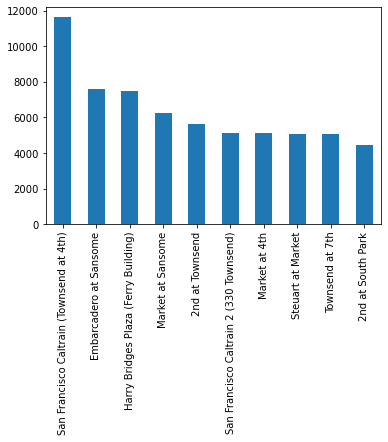

In [184]:
df_esf10.plot("bar")

Looking at just most popular stations, what are the qualitative similarities and differences between start and end stations?

In [188]:
pd.concat([df_ssf10, df_esf10], axis=1, sort=False)

,start_station,end_station
San Francisco Caltrain (Townsend at 4th),9838.0,11637.0
Harry Bridges Plaza (Ferry Building),7343.0,7475.0
Embarcadero at Sansome,6545.0,7590.0
Market at Sansome,5922.0,6238.0
Temporary Transbay Terminal (Howard at Beale),5113.0,NaN
Market at 4th,5030.0,5109.0
2nd at Townsend,4987.0,5655.0
San Francisco Caltrain 2 (330 Townsend),4976.0,5112.0
Steuart at Market,4913.0,5080.0
Townsend at 7th,4493.0,5073.0


Create a table that has start_station segmented by subscription_type.

Include the marginals
<br>
<br>
<details><summary>
Click here for a hint…
</summary>
`pd.crosstab`
</details>

In [192]:
pd.crosstab(index=df["start_station"], columns=df["subscription_type"], margins=True )

subscription_type,Customer,Subscriber,All
start_station,,,
2nd at Folsom,427,3349,3776
2nd at South Park,535,3923,4458
2nd at Townsend,882,4105,4987
5th at Howard,606,2029,2635
Adobe on Almaden,75,260,335
Arena Green / SAP Center,82,257,339
Beale at Market,457,2600,3057
Broadway St at Battery St,20,181,201
Broadway at Main,14,31,45


-----

Let's look at duration....

How long is the shortest trip? How many are that short?

In [201]:
dur_min = df["duration"].min()
print(dur_min)
short = df[df["duration"] == dur_min]

short["duration"].count()

60


17

What do you think is going on with the shrort trips?

In [206]:
# @allows to use variables for queries!!
df.query("duration == @dur_min")

# all of this trips have the same start and end_terminal. Hennce it is likely that the trips are roundtrips with a length of exackt 60 minutes
# or that those trips never startet.

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
2887,8576,60,9/2/2013 9:40,Harry Bridges Plaza (Ferry Building),50,9/2/2013 9:41,Harry Bridges Plaza (Ferry Building),50,354,Subscriber,94102
2925,8651,60,9/2/2013 10:50,San Francisco Caltrain 2 (330 Townsend),69,9/2/2013 10:51,San Francisco Caltrain 2 (330 Townsend),69,544,Subscriber,94107
3535,9444,60,9/3/2013 8:37,Redwood City Public Library,24,9/3/2013 8:38,Redwood City Public Library,24,239,Subscriber,94105
7296,14644,60,9/8/2013 13:55,San Francisco Caltrain (Townsend at 4th),70,9/8/2013 13:56,San Francisco Caltrain (Townsend at 4th),70,521,Subscriber,95126
10457,18792,60,9/12/2013 10:09,Civic Center BART (7th at Market),72,9/12/2013 10:10,Civic Center BART (7th at Market),72,632,Subscriber,94103
11545,20271,60,9/13/2013 12:43,Market at 4th,76,9/13/2013 12:44,Market at 4th,76,500,Subscriber,94116
13437,22689,60,9/15/2013 21:15,Embarcadero at Sansome,60,9/15/2013 21:16,Embarcadero at Sansome,60,577,Subscriber,94111
20568,32159,60,9/23/2013 18:53,Townsend at 7th,65,9/23/2013 18:54,Townsend at 7th,65,566,Subscriber,94107
40000,57581,60,10/14/2013 14:47,Clay at Battery,41,10/14/2013 14:48,Clay at Battery,41,368,Subscriber,94158
55127,77650,60,10/30/2013 18:22,Harry Bridges Plaza (Ferry Building),50,10/30/2013 18:23,Harry Bridges Plaza (Ferry Building),50,416,Subscriber,94110


What is the longest trip? How many trips are "long"?

In [217]:
dur_max = df["duration"].max()
df[df["duration"] == dur_max]["duration"].count() #see condition in squared brackets!

1

Do the long durations seem reasonable? Why are they so long? What could that tell us about the users?

In [225]:
#get 10 longest durations:
dur_sorted = df.sort_values(by="duration", ascending=False)
dur_sorted10 = dur_sorted.head(100)
dur_sorted10

# probably the users forgot to check out at their destination. Most of the clients a single fare customers.
# Those often lacks of experience referring the checkout process.


,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
80510,111309,722236,11/30/2013 13:29,University and Emerson,35,12/8/2013 22:06,University and Emerson,35,247,Customer,94301
93400,129504,619322,12/18/2013 9:16,San Jose Diridon Caltrain Station,2,12/25/2013 13:18,SJSU 4th at San Carlos,12,653,Subscriber,94041
20535,32121,597517,9/23/2013 18:24,California Ave Caltrain Station,36,9/30/2013 16:23,Palo Alto Caltrain Station,34,168,Customer,95051
119830,166010,586356,1/25/2014 20:00,San Antonio Caltrain Station,29,2/1/2014 14:53,San Antonio Caltrain Station,29,693,Customer,94303
43549,62246,429384,10/17/2013 16:06,Davis at Jackson,42,10/22/2013 15:23,Powell Street BART,39,465,Customer,43113
24068,36617,329456,9/26/2013 20:51,Park at Olive,38,9/30/2013 16:22,Palo Alto Caltrain Station,34,162,Customer,94306
12725,21760,309479,9/14/2013 18:21,SJSU 4th at San Carlos,12,9/18/2013 8:19,SJSU - San Salvador at 9th,16,242,Customer,95112
108144,150269,303271,1/11/2014 20:16,Civic Center BART (7th at Market),72,1/15/2014 8:31,Civic Center BART (7th at Market),72,538,Customer,94110
100174,138946,296045,12/31/2013 9:43,Rengstorff Avenue / California Street,33,1/3/2014 19:57,Rengstorff Avenue / California Street,33,217,Customer,NaN
80086,110706,280439,11/29/2013 11:33,Post at Kearney,47,12/2/2013 17:27,Market at Sansome,77,593,Customer,33141


Timebox 15 minutes to explore the data guided by your own intuition or hypotheses…

Be prepared to show something to the rest of class.

**Hypthose**: There is a distinct relationship between bike_num and average duration.

In [227]:
# overall_values:

df["duration"].describe()


count    144015.000000
mean       1230.910141
std        6652.962329
min          60.000000
25%         349.000000
50%         531.000000
75%         797.000000
max      722236.000000
Name: duration, dtype: float64

In [248]:
gob = df.groupby("bike_num").agg(["mean", "count"])["duration"] # agg allows to combine functions and creates temp colums
#ob_sorted = gob.sort_values(by="duration.mean()")
gobs = gob.sort_values(by="mean",ascending=False) #...therefor it is possible to access these columns
gobs

,mean,count
bike_num,,
247,38162.000000,22
162,25443.785714,14
653,25319.037037,27
168,23871.518519,27
105,12889.217391,23
707,12876.318182,22
242,12661.923077,26
693,12213.111111,54
226,10712.130435,23


<AxesSubplot:ylabel='Frequency'>

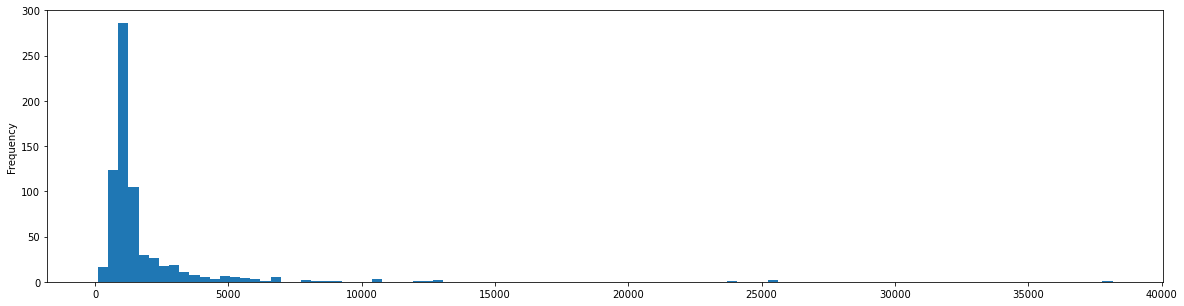

In [255]:
gobs["mean"].plot(kind="hist", bins=100, figsize=(20, 5))

-----
Challenge Exercises
-----

Plot duration

<AxesSubplot:ylabel='Frequency'>

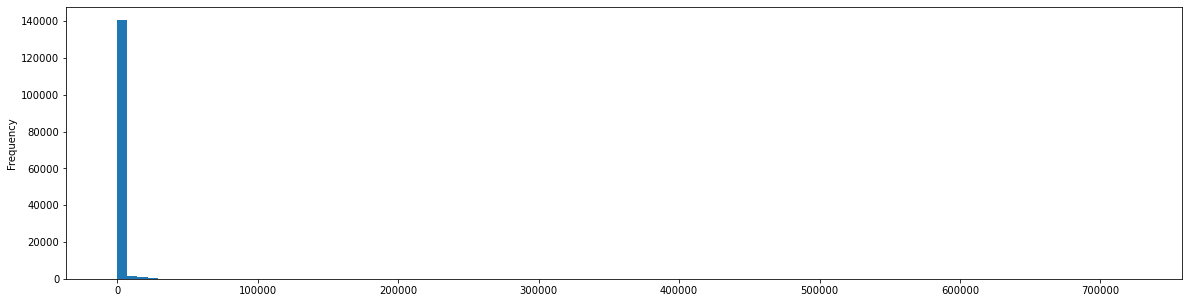

In [268]:
df["duration"].plot(kind="hist", bins=100, figsize=(20,5))

Does that plot give insights?

In [ ]:
# At most a few! We can see that there are some extreme outliers around the center.

Select subsections of the data to make a series of plots to enable insights for the Product Team

<AxesSubplot:ylabel='Density'>

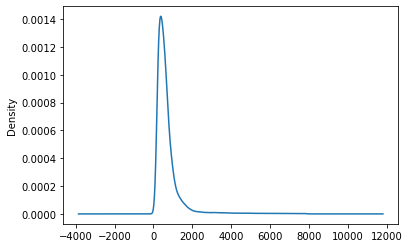

In [276]:
dur_std2 = (df["duration"].std())  # determine 2nd standard dev
dur_mean = df["duration"].mean()
dur_std2_min = dur_mean - dur_std2
dur_std2_max = dur_mean + dur_std2
df_std2 = df.query("@dur_std2_min <= duration <= @dur_std2_max")
df_std2["duration"].plot(kind="kde")

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

__DO NOT USE A FOR LOOP. THEY ARE THE 👿__

In [279]:
df["start_station"] = df["start_station"].apply(lambda x: x.lower().replace(" ","_"))
df["start_station"]

0                              south_van_ness_at_market
1                                    san_jose_city_hall
2                               mountain_view_city_hall
3                                    san_jose_city_hall
4                              south_van_ness_at_market
5                                   golden_gate_at_polk
6                                santa_clara_at_almaden
7                                   san_salvador_at_1st
8                              south_van_ness_at_market
9                                    san_jose_city_hall
10                                      spear_at_folsom
11                                     san_pedro_square
12                       mountain_view_caltrain_station
13                                    2nd_at_south_park
14                                      clay_at_battery
15                                      post_at_kearney
16                                   san_jose_city_hall
17                                       market_

<br>
<br> 
<br>

----